In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [53]:
df  = pd.read_csv("/Users/devrajdutta/Downloads/MLP Files/german_credit_data.csv")

In [54]:
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Creditamount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [55]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()

Unnamed: 0           0
Age                  0
Sex                  0
Job                  0
Housing              0
Savingaccounts     183
Checkingaccount    394
Creditamount         0
Duration             0
Purpose              0
Risk                 0
dtype: int64


In [56]:
df.dropna(subset = ["Savingaccounts","Checkingaccount"], inplace=True)

In [57]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Creditamount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [58]:
print(df.isna().sum())
missing_status=df.isna().sum()

Unnamed: 0         0
Age                0
Sex                0
Job                0
Housing            0
Savingaccounts     0
Checkingaccount    0
Creditamount       0
Duration           0
Purpose            0
Risk               0
dtype: int64


In [59]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Savingaccounts',
       'Checkingaccount', 'Creditamount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Housing = le.fit_transform(df.Housing)
df.Savingaccounts = le.fit_transform(df.Savingaccounts)
df.Risk = le.fit_transform(df.Risk)
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Creditamount,Duration,Purpose,Risk
1,1,22,female,2,1,0,moderate,5951,48,radio/TV,0
3,3,45,male,2,0,0,little,7882,42,furniture/equipment,1
4,4,53,male,2,0,0,little,4870,24,car,0
7,7,35,male,3,2,0,moderate,6948,36,car,1
9,9,28,male,3,1,0,moderate,5234,30,car,0


In [61]:
X=df[['Job','Housing','Savingaccounts']]
Y=df[['Risk']]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [63]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [64]:
Y_pred = knn.predict(X_test)

In [65]:
confusion_matrix(Y_test, Y_pred)

array([[15, 38],
       [23, 55]])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5343511450381679

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was pas

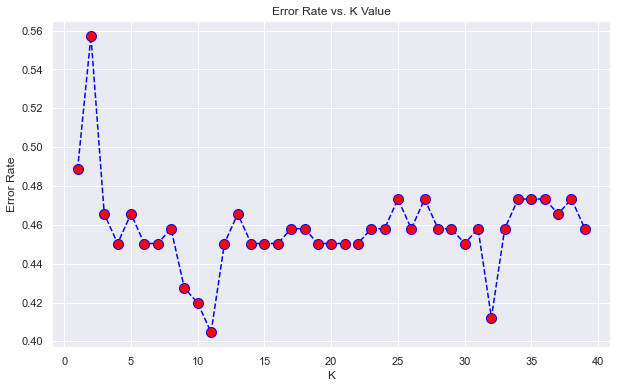

Minimum error:- 0.40458015267175573 at K = 11


In [67]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [68]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn.fit(X_train, Y_train)

/Users/devrajdutta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [69]:
Y_pred = knn.predict(X_test)

In [70]:
accuracy_score(Y_test, Y_pred)

0.5954198473282443

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
import graphviz

In [72]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
X=df[['Job','Housing','Savingaccounts']]
Y=df[['Risk']]

In [74]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, stratify = Y)

In [76]:
X_train.shape 
print()

X_test.shape  
print()

(365, 3)

(157, 3)

In [77]:
ct = dtree(criterion="gini", max_depth=None)

In [78]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [79]:
Y_te = ct.predict(X_test)

In [80]:
Y_te = Y_te.reshape(157,1)

In [81]:
np.sum((Y_test == Y_te))/Y_test.size

Risk    0.566879
dtype: float64

<Figure size 864x504 with 0 Axes>

[Text(407.45625, 356.73749999999995, 'X[1] <= 0.733\ngini = 0.494\nsamples = 365\nvalue = [162, 203]'),
 Text(238.31250000000003, 309.1725, 'X[1] <= -1.022\ngini = 0.485\nsamples = 296\nvalue = [122, 174]'),
 Text(120.9, 261.60749999999996, 'X[0] <= 0.916\ngini = 0.494\nsamples = 47\nvalue = [26, 21]'),
 Text(74.4, 214.0425, 'X[2] <= 1.522\ngini = 0.403\nsamples = 25\nvalue = [18, 7]'),
 Text(37.2, 166.4775, 'X[0] <= -0.55\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(18.6, 118.91250000000002, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(55.800000000000004, 118.91250000000002, 'X[2] <= 0.207\ngini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(37.2, 71.34749999999997, 'gini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(74.4, 71.34749999999997, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 166.4775, 'X[0] <= -1.283\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(93.0, 118.91250000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(130.2000

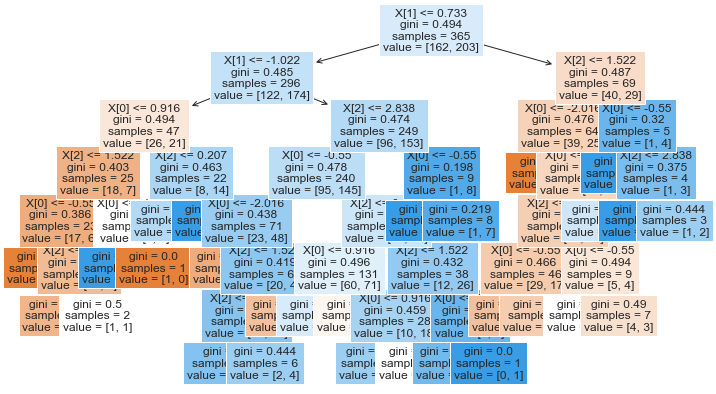

In [82]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [84]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

/var/folders/j1/dtchj8_j3vvdkl3k52_qz2ym0000gn/T/ipykernel_26889/1616795480.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestRegressor(random_state=1)

In [85]:
Yhat = model.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[0.55698698 0.57272039 0.72286283 0.72286283 0.55698698 0.48484084
 0.55698698 0.31409359 0.36475795 0.85722181 0.72286283 0.51078571
 0.72286283 0.55698698 0.55698698 0.55698698 0.48484084 0.55698698
 0.48484084 0.55698698 0.32905808 0.78536973 0.55698698 0.55698698
 0.55698698 0.48484084 0.48484084 0.55698698 0.72286283 0.45752237
 0.72286283 0.55632171 0.32905808 0.5248499  0.55698698 0.55698698
 0.31409359 0.55698698 0.55698698 0.31758333 0.48140584 0.57272039
 0.61304107 0.32905808 0.55698698 0.1580119  0.72286283 0.48484084
 0.72286283 0.55559524 0.48484084 0.55698698 0.55698698 0.31409359
 0.66602056 0.55698698 0.55698698 0.31409359 0.73890179 0.55698698
 0.57272039 0.55698698 0.36475795 0.55698698 0.55698698 0.36475795
 0.72286283 0.55698698 0.31409359 0.71688492 0.66071327 0.66071327
 0.66602056 0.78536973 0.85722181 0.55698698 0.72286283 0.04869851
 0.55698698 0.48484084 0.61304107 0.31409359 0.36475795 0.36475795
 0.36475795 0.55698698 0.55698698 0.85722181 0.66071327 0.3290

In [86]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

/var/folders/j1/dtchj8_j3vvdkl3k52_qz2ym0000gn/T/ipykernel_26889/117644506.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


RandomForestClassifier()

In [97]:
import sklearn.metrics as metrics

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
len(Y_test)

157

In [89]:
len(Y_pred)

131

In [94]:
Y_testing = Y_test[0:131]

In [95]:
accuracy_score(Y_testing, Y_pred)

0.5648854961832062

In [98]:
metrics.confusion_matrix(Y_testing, Y_pred)

array([[14, 45],
       [12, 60]])

In [99]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Savingaccounts',
       'Checkingaccount', 'Creditamount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [100]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index =['Job','Housing','Savingaccounts']).sort_values(ascending=False)
feature_imp

Job               0.362498
Housing           0.346596
Savingaccounts    0.290906
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


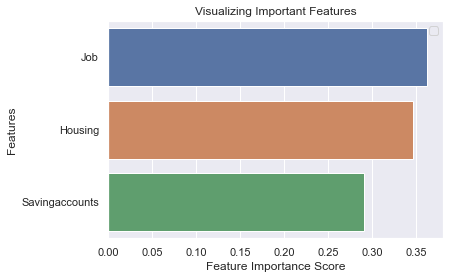

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()